<a href="https://colab.research.google.com/github/ricocy23/BIg_data/blob/main/Kelolmpok_9_21_11_4380.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/WebScrap_OLX_Rumah_Jkt_Final.csv')
df.head()

,Jumlah_Kamar,Jumlah_Kamar_Mandi,Jumlah_Lantai,Luas_Bangunan,Luas_Tanah,Sertifikasi,Lokasi,Harga
0,6,1,1,148,148,SHM,Setia Budi,1100000000
1,5,4,3,84,200,SHM,Tebet,2100000000
2,3,3,2,134,130,SHM,Pasar Minggu,2800000000
3,3,2,1,132,100,SHM,Pesanggrahan,1480000000
4,3,4,2,92,147,SHM,Pesanggrahan,2300000000


   Jumlah_Kamar  Jumlah_Kamar_Mandi  Jumlah_Lantai  Luas_Bangunan  Luas_Tanah  \
0             6                   1              1            148         148   
1             5                   4              3             84         200   
2             3                   3              2            134         130   
3             3                   2              1            132         100   
4             3                   4              2             92         147   

  Sertifikasi        Lokasi       Harga  
0         SHM    Setia Budi  1100000000  
1         SHM         Tebet  2100000000  
2         SHM  Pasar Minggu  2800000000  
3         SHM  Pesanggrahan  1480000000  
4         SHM  Pesanggrahan  2300000000  
       Jumlah_Kamar  Jumlah_Kamar_Mandi  Jumlah_Lantai  Luas_Bangunan  \
count    238.000000          238.000000     238.000000     238.000000   
mean       2.991597            2.268908       1.773109      81.201681   
std        0.811269            0.973900   

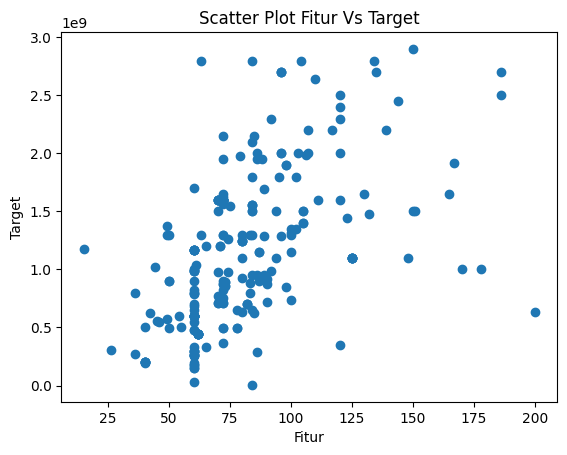

In [ ]:
print(df.head())
print(df.describe())

plt.scatter(df['Luas_Bangunan'], df['Harga'])
plt.xlabel('Luas_Bangunan')
plt.ylabel('Harga')
plt.title('Scatter Plot Luas bangunan Vs Harga')
plt.show()

Korelasi antara fitur dan target: 0.533848888493447


<ipython-input-30-a734dc632de3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


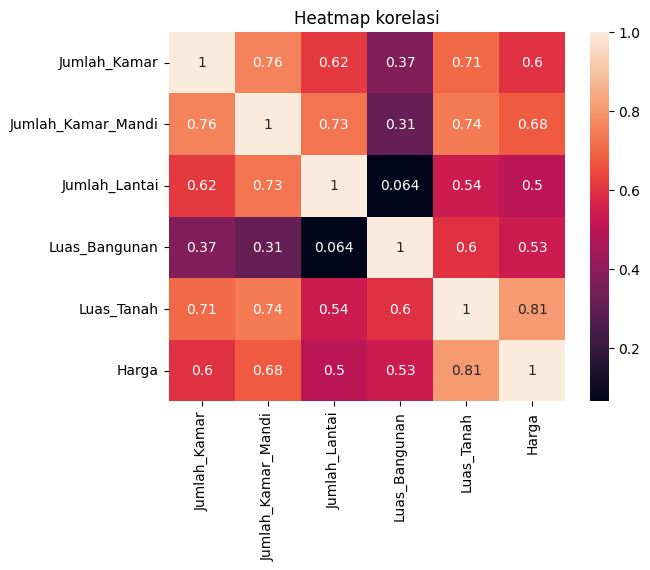

In [ ]:
correlation = df['Luas_Bangunan'].corr(df['Harga'])
print('Korelasi antara fitur dan target:', correlation)
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap korelasi')
plt.show()

In [ ]:
np.random.seed(42)
split = np.random.rand(len(df)) < 0.8
train = df[split]
test = df[~split]

In [ ]:
X_train = np.asanyarray(train[['Luas_Tanah']])
y_train = np.asanyarray(train[['Harga']])

X_test = np.asanyarray(test[['Luas_Tanah']])
y_test = np.asanyarray(test[['Harga']])

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print ('Coefficients: ', lr_model.coef_)
print ('Intercept: ', lr_model.intercept_)

Coefficients:  [[12917901.5381186]]
Intercept:  [-6299488.80305219]


Text(0, 0.5, 'Harga')

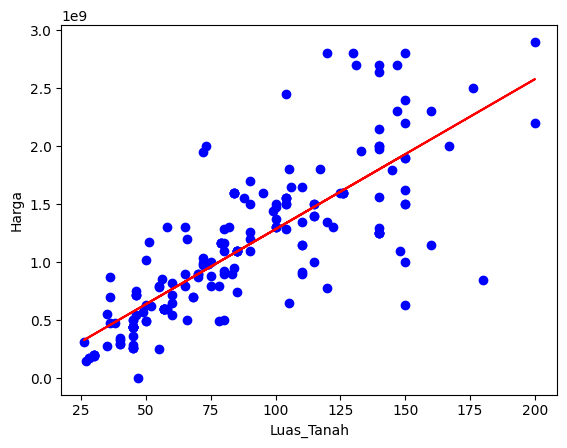

In [ ]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, lr_model.coef_[0][0]*X_train + lr_model.intercept_[0], '-r')
plt.xlabel('Luas_Tanah')
plt.ylabel('Harga')

In [ ]:
y_pred = lr_model.predict(X_test)

print('Data asli: \n', y_test[0:10])
print('\n')
print('Hasil prediksi: \n', y_pred[0:10])

Data asli: 
 [[2100000000]
 [  30000000]
 [1650000000]
 [1690000000]
 [ 150500000]
 [ 285000000]
 [ 265000000]
 [1600000000]
 [1600000000]
 [1600000000]]


Hasil prediksi: 
 [[2.57728082e+09]
 [3.81237557e+08]
 [1.35008017e+09]
 [1.11755795e+09]
 [3.42483853e+08]
 [5.75006080e+08]
 [4.58744967e+08]
 [1.07880424e+09]
 [1.62135610e+09]
 [1.62135610e+09]]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Menampilkan MAE dan MSE
print('Mean Absolute Error (MAE): %.2f' % mean_absolute_error(y_pred, y_test))
print('Mean Squared Error (MSE): %.2f' % mean_squared_error(y_pred, y_test))

Mean Absolute Error (MAE): 304630130.32
Mean Squared Error (MSE): 162998882925478912.00
